# Module 1: Fish and heavy metal contaminants

Members of the K�avi have fished the waters on their land for many years to provide food for their community. To manage these waters, K'avi tribal fishery managers have been monitoring fish growth rates across the local water bodies in their community.

However, many members of the community have begun to experience health problems associated with heavy metal poisoning. Historically, a factory used to be located upstream of the riverways fished by the K�avi, and waste from this factory was dumped into the nearby waters. Tribal fishery managers are now concerned that members of the community are being exposed to heavy metals through the fish that have been caught in these waters. As a result, they now want to start recording the concentrations of methylmercury in the belly fat of fish in the area.


In [1]:
# Load necessary libraries
if(!require("tidyverse")) install.packages("tidyverse")
library(tidyverse)

Loading required package: tidyverse

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Clearing Environment

We clear the environment each time we open R to avoid leftover objects from previous sessions.

In [2]:
rm(list = ls())

## Setting the Working Directory

Setting the working directory allows R to locate files correctly.

In [4]:
getwd()

[1] "C:/Users/rdt47/Documents/GitHub/EJ-DS/Mod1_Fish"

## Calculating screening values for mercury in fish

In [6]:
# Define variables
weight = 160 # lbs
days_per_week = 7

# Constants
RfD = 0.1 # ug mercury /kg body weight/day
cr = 110*days_per_week/7

# Calculate safe limit
safe_limit = RfD * weight * 0.45 / cr

print(safe_limit)

[1] 0.06545455


### Creating and Manipulating Data Frames

In [7]:
# Create data frame
weight = c(140, 175, 200)
serving = c(1, 6, 3)
sv_df <- data.frame(weight, serving)

# Add column for screening value
sv_df$screen_val = RfD * sv_df$weight * 0.45 / (110 * sv_df$serving / 7)
sv_df

weight,serving,screen_val
<dbl>,<dbl>,<dbl>
140,1,0.40090909
175,6,0.08352273
200,3,0.19090909


### Plotting Screening Value vs. Servings Per Week

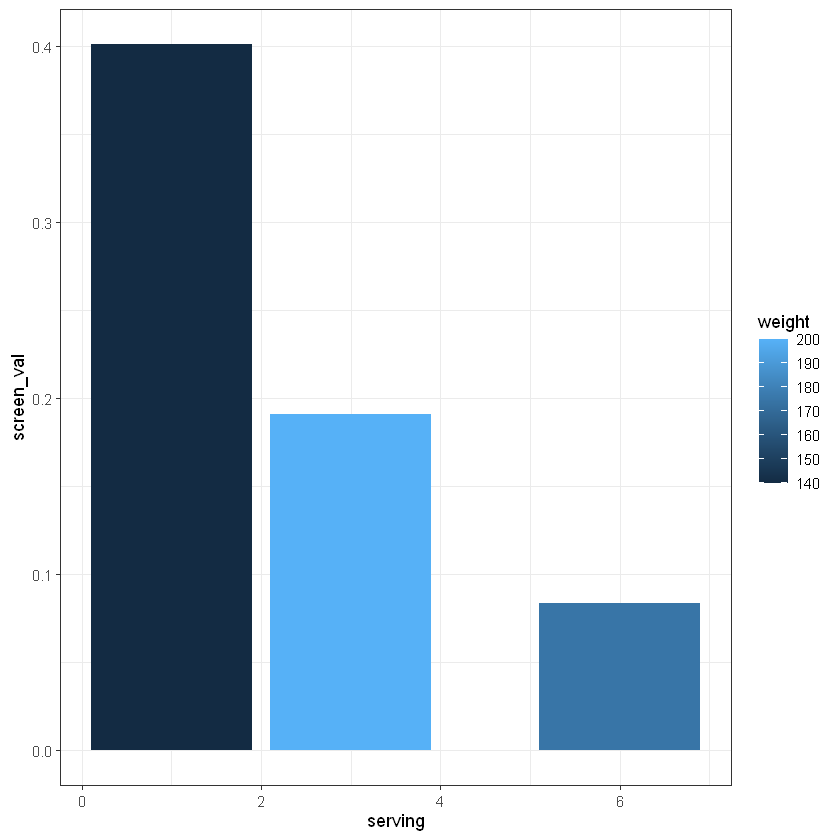

In [11]:
library(ggplot2)
ggplot(sv_df) + geom_col(aes(x=serving, y=screen_val, fill=weight)) + theme_bw()